In [457]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [458]:
seed = 4

x_m, y_m = make_classification(n_samples=60000, n_features=2, n_redundant=0, weights=[0.6], random_state=seed)
x_f, y_f = make_classification(n_samples=15000, n_features=2, n_redundant=0, weights=[0.4], random_state=seed)
m = [[1] for _ in range(60000)]
f = [[0] for _ in range(15000)]

In [459]:
m_join = np.append(x_m, m, axis=1)
m_join = np.append(m_join, np.expand_dims(y_m, axis=1), axis=1)

f_join = np.append(x_f, f, axis=1)
f_join = np.append(f_join, np.expand_dims(y_f, axis=1), axis=1)

join = np.append(m_join, f_join, axis=0)
np.random.seed = seed
np.random.shuffle(join)

np.savetxt("data.csv", join, delimiter=',', header='"x1","x2","a","y"', comments='')
# print(np.unique(y_m, return_counts= True))

In [460]:
df = pd.read_csv("data.csv")

In [461]:
# df.drop(["ID"], axis=1, inplace=True)
# df.dropna(axis=0, inplace=True)
df.head()

,x1,x2,a,y
0,-1.089577,1.200028,1.0,0.0
1,1.698208,-0.502264,0.0,0.0
2,0.159603,-1.510330,1.0,0.0
3,-2.721188,-1.008214,1.0,0.0
4,0.827396,0.481633,1.0,1.0


In [462]:
# df["SEX"].value_counts()
#
# df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
# df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
# df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
#
# df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])
#
# def age(x):
#     if x in range(21,41):
#         return 1
#     elif x in range(41,61):
#         return 2
#     elif x in range(61,80):
#         return 3
#
# df['AGE']=df['AGE'].apply(age)

In [463]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [464]:
model = LogisticRegression(solver="lbfgs", random_state=seed)
# model = DecisionTreeClassifier()
model.fit(x_train, y_train)

comb = x_test.join(y_test)
comb.head()

sex_1 = comb.loc[comb['a'] == 0]
sex_2 = comb.loc[comb["a"] == 1]
#
x_1 = sex_1.iloc[:, :-1]
y_1 = sex_1.iloc[:, -1]

x_2 = sex_2.iloc[:, :-1]
y_2 = sex_2.iloc[:, -1]


# y_test_m = y_test.loc[y_test["SEX"] == 1]
# y_test_f = y_test.loc[y_test["SEX"] == 2]

p_1 = model.predict_proba(x_1)[: ,1] # only keep positive results
p_2 = model.predict_proba(x_2)[: ,1] # only keep positive results

In [465]:
fpr_1, tpr_1, _ = roc_curve(y_1, p_1)
fpr_2, tpr_2, _ = roc_curve(y_2, p_2)


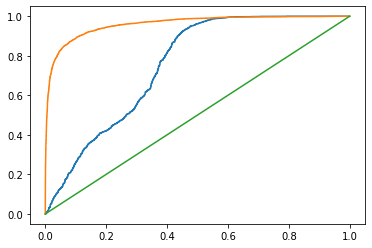

In [466]:
plt.plot(fpr_1, tpr_1)
plt.plot(fpr_2, tpr_2)
plt.plot([0,1], [0,1])
plt.show()